## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Import Data
### Car Crashes Data provided by seaborn

In [3]:
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Distribution Plots
### 1: Distribution Plot
It's for plotting univariate distribution which is a probability distribution of only one random variable.<br>
Let's see the distribution of "alcohol"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

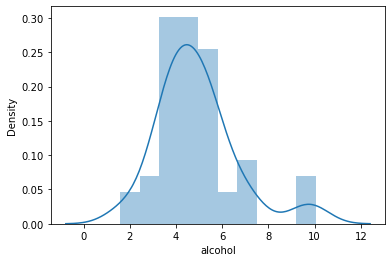

In [4]:
sns.distplot(df['alcohol'])

The resulted default graph is a histogram graph <br>
with kernel density estimation, we can remove it, and we can change the number of bins <br>
and a lot more!

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol'>

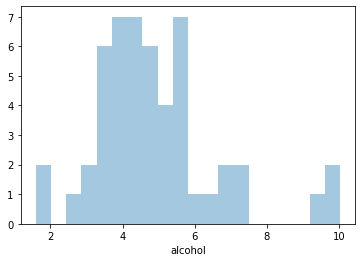

In [5]:
#No KDE and change the number of bins
sns.distplot(df['alcohol'], kde=False, bins = 20)

### 2: Joint Plot
Used to compare two distributions, and plot a scatter plot by default. <br>
Let's plot the speed vs if the driver was drunk!

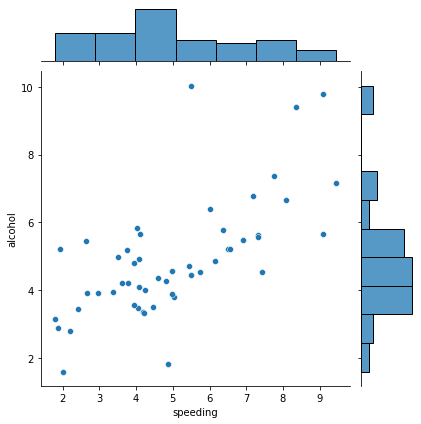

In [6]:
sns.jointplot(x='speeding',y='alcohol', data=df)

We can also plot the regression line between the data points!

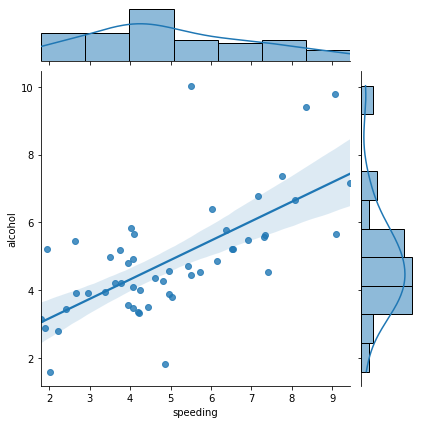

In [7]:
sns.jointplot(x='speeding',y='alcohol', data=df, kind='reg')

Plotting just the kernel density estimation

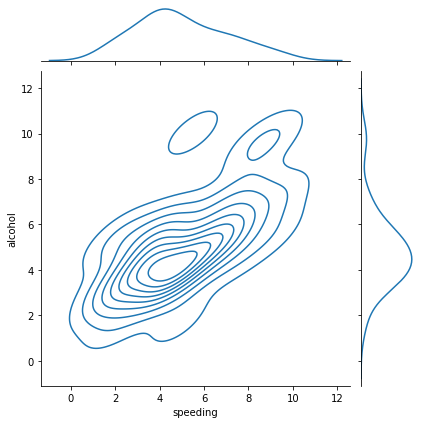

In [8]:
sns.jointplot(x='speeding',y='alcohol', data=df, kind='kde')

Or we can plot the Hexagonal Binning which is another way to manage the problem of <br>
having to many points that start to overlap. <br>
Hexagonal binning plots density, rather than points. <br>
Points are binned into gridded hexagons <br>
and distribution (the number of points per hexagon) is displayed using<br>
either the color or the area of the hexagons

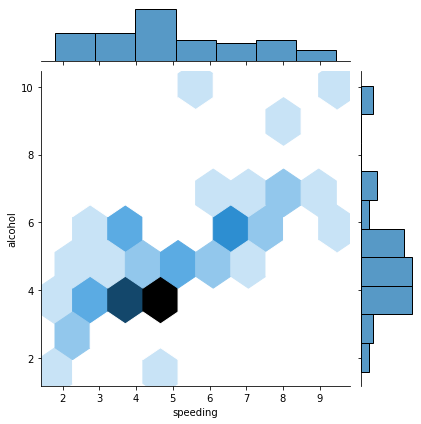

In [9]:
sns.jointplot(x='speeding',y='alcohol', data=df, kind='hex')

### 3: KDE Plot
Just plotting the kernel density estimation

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

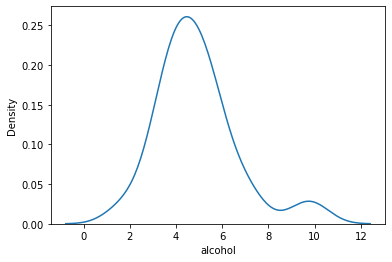

In [10]:
sns.kdeplot(df['alcohol'])

### 4: Pair Plot
To plot the relationships across the entire<br>
dataframe's numerical values

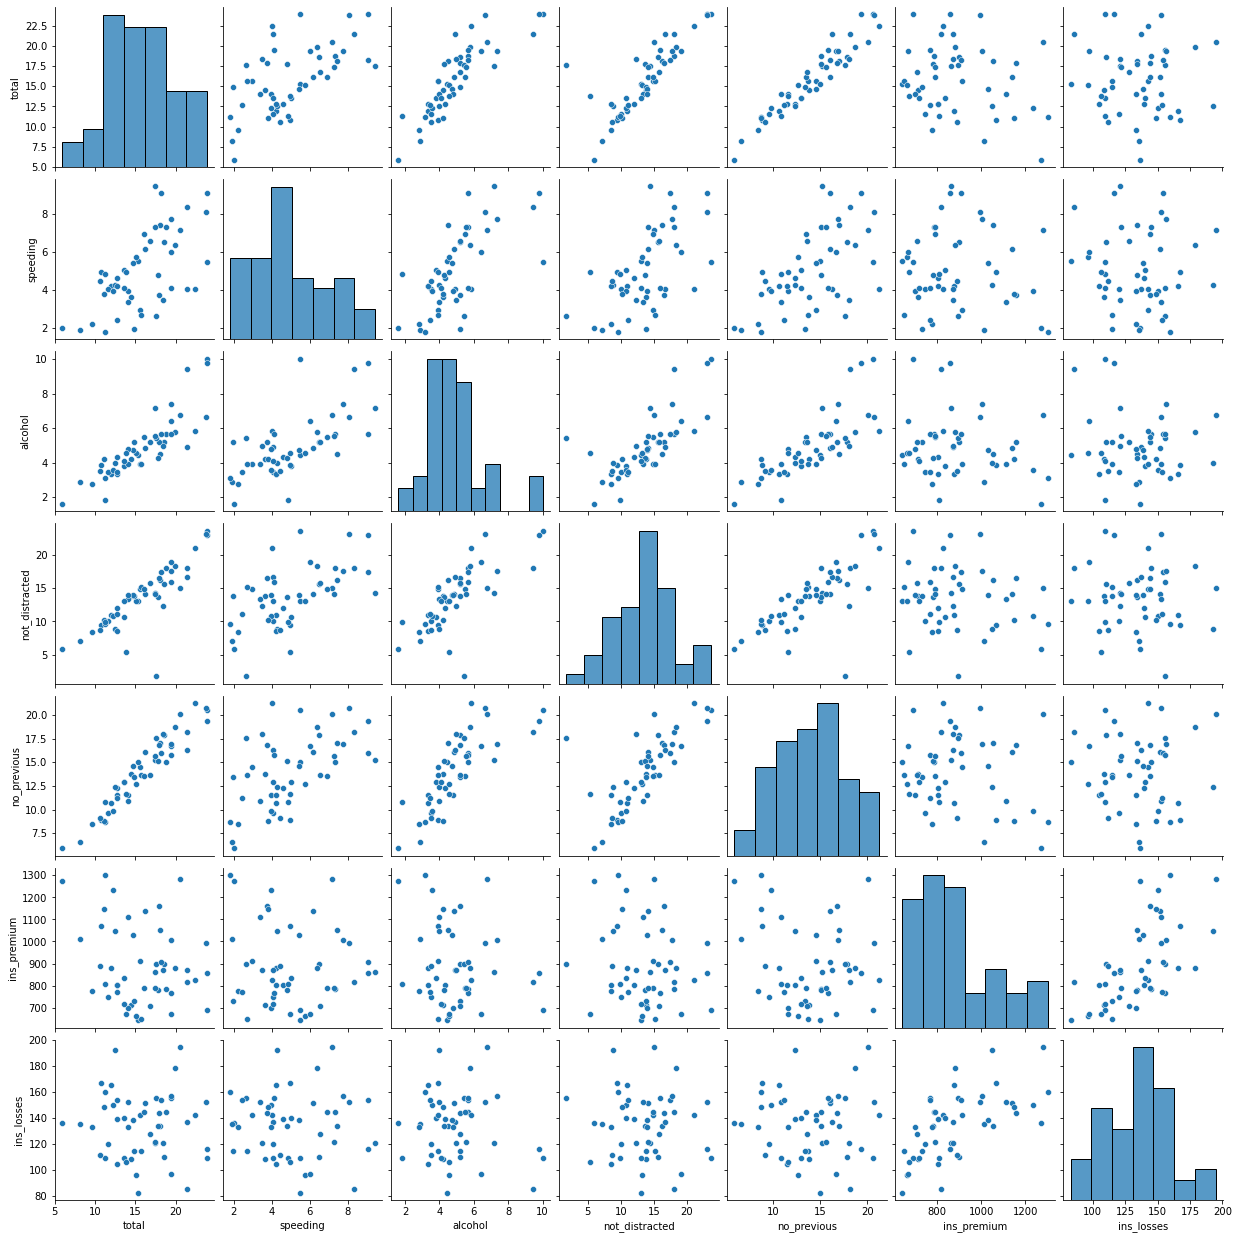

In [11]:
sns.pairplot(df)

Let's Use another data

In [12]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Using the "hue" parameter:<br>
It takes a categorical variable and the charts will be colorized based on<br>
the values of the categorical variable. Let's colorize based on sex!

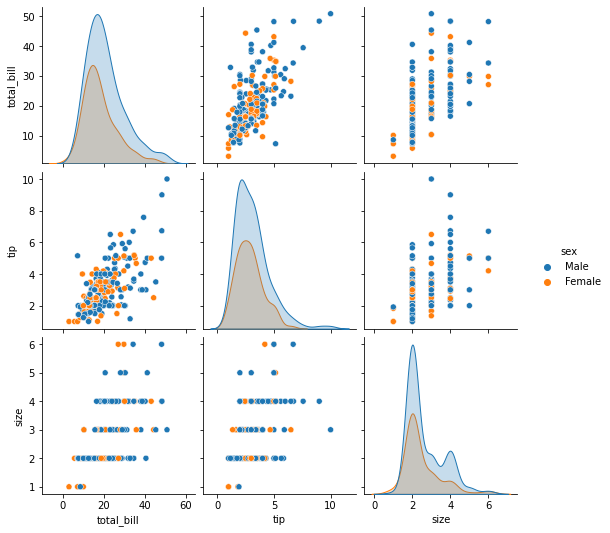

In [13]:
sns.pairplot(tips_df, hue='sex')

### 5: Rug Plot
It's going to plot a single column of data points in a dataframe as "sticks".<br>
The more dense number of lines is where the amount is most common. <br>
It's similar to a histogram, however, the indication is denser instead of taller where<br>
the values are more common.

<AxesSubplot:xlabel='total_bill'>

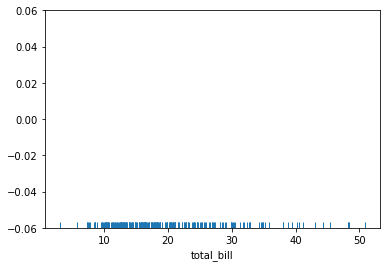

In [14]:
sns.rugplot(tips_df['total_bill'])

### Styling Distribution Plots
Let's first plot a joint plot for speeding and alcohol in the car crashes data.

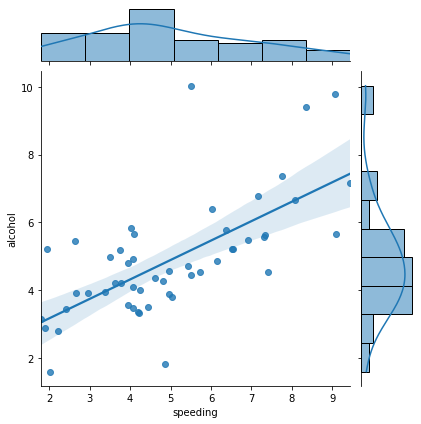

In [15]:
sns.jointplot(x='speeding', y='alcohol', data=df, kind='reg')

Let's play around with styling!

In [16]:
sns.set_style('darkgrid') #dark color with grids

plt.figure(figsize=(8,4)) #setting figure size

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

Font scaling with the context of paper/jupyter notebook

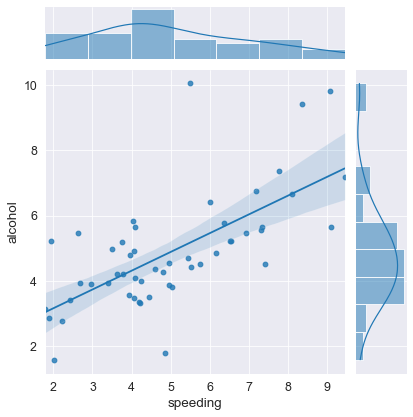

In [17]:
sns.set_context('paper', font_scale=1.4)
sns.jointplot(x='speeding', y='alcohol', data=df, kind='reg')

Font scaling with talk context (presentaion)

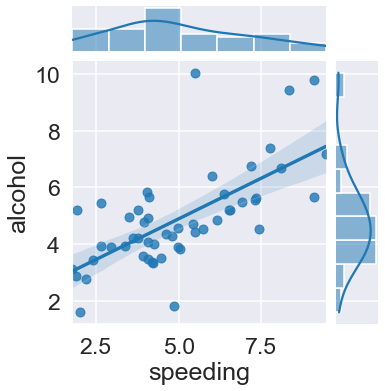

In [18]:
sns.set_context('talk', font_scale=1.4)
sns.jointplot(x='speeding', y='alcohol', data=df, kind='reg')

Font scaling with poster context

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1629: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


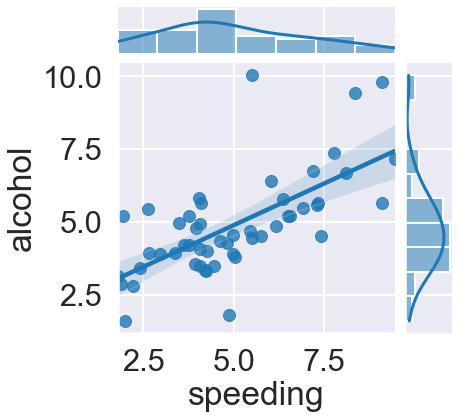

In [19]:
sns.set_context('poster', font_scale=1.4)
sns.jointplot(x='speeding', y='alcohol', data=df, kind='reg')

## Categorical Plots
Distributions using categorical data in reference to one<br>
of the pieces of numerical data
### 1: Bar Plot
Let's analyze some information in regard to tipping for different males and females.

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

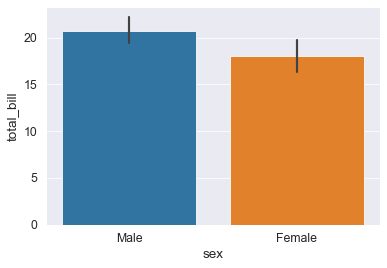

In [22]:
sns.set_context('paper', font_scale=1.4)
sns.barplot(x='sex', y='total_bill', data=tips_df)

The little bar there is referencing variance between sex and total bill amount.<br>
<br>
Note:<br>
The data by default is aggregated based of the mean, but you we can change that<br>
using the "estimator" parameter. Let's change it to be based on the covariance!

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

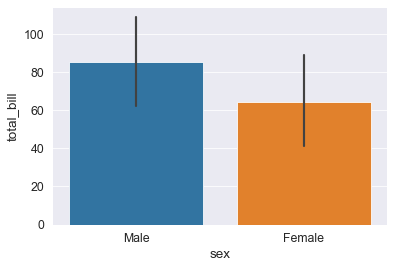

In [23]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.cov)

### 2: Count Plot
It's kind of like a bar plot, but the estimator is just simply going to count the number of occurences.<br>
Let's find the total number of males and females.

<AxesSubplot:xlabel='sex', ylabel='count'>

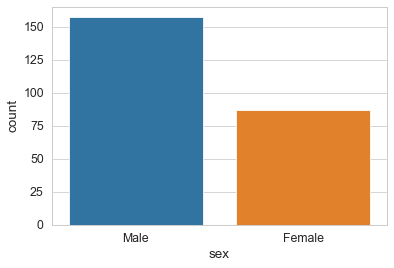

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips_df)

### 3: Box Plot
Allows you to compare different variables and show you quartiles of the data.<br><br>
Let's see how men and women change in regards to the total bills over multiple different days!

<AxesSubplot:xlabel='day', ylabel='total_bill'>

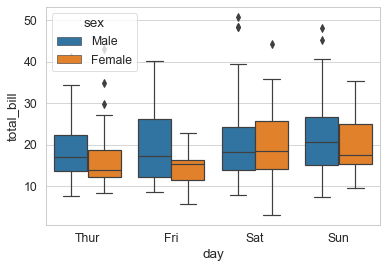

In [30]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

- The box represents a quartile of the data.<br>
- The bar that goes across the middle of the box is the median.<br>
- The box is going to extend one standard deviation from the median.<br>
- The Ts are clalled whiskers, they show us the variability outside the upper and lower quartiles.<br>
- Whiskers extend to the highest and lowest observations.<br>
- The points outside the whiskers are considered outliers.

### 4: Violin Plot
A combination of a box plot and KDE plot.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

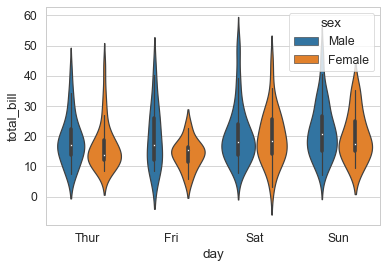

In [37]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex')

While the box plot corresponds to data points, the violin plot uses the KDE estimation of our data points.<br>
We can add a "split" parameter which is going to allow you to see how the categories compare to each other.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

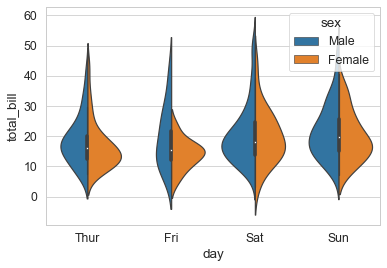

In [39]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

### 5: Strip Plot
- Shows us a scatter plot representing all the different data points where one variable is categorical.<br>
- Used to show different observation with a box plot.<br>
- It represents the average distributions.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

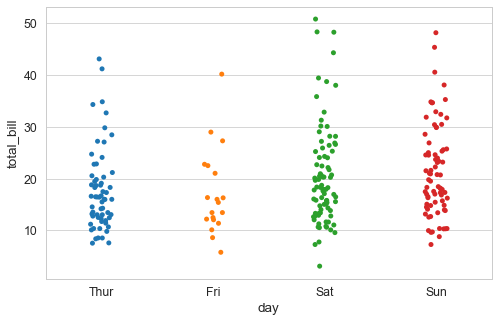

In [40]:
plt.figure(figsize=(8,5))
sns.stripplot(x='day', y='total_bill', data=tips_df)

Making it better using hue, and dodge:

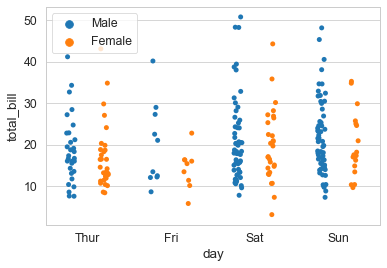

In [52]:
#Dodge: To seperate based on hue
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', dodge=True) 
plt.legend(loc='upper left')

### 6: Swarm Plot
Draw a categorical scatterplot with non-overlapping points.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

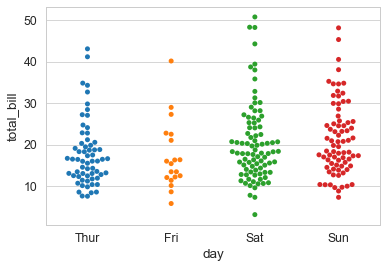

In [53]:
sns.swarmplot(x='day', y='total_bill', data=tips_df)

**You can use it on top of other plots!**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

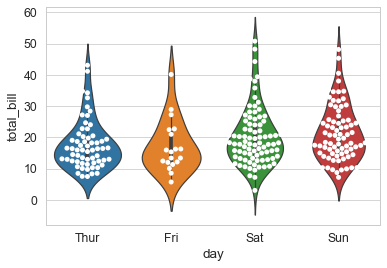

In [55]:
sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

## Matrix Plots
- Plotting matrix data.
- Color-coded diagrams that has rows data, columns data, and values.
### 1: Heatmaps
- Plot rectangular data as a color-encoded matrix.
- Display numeric tabular data where the cells are colored depending upon the contained value.
- The idea is straightforward, replace numbers with colors!

**The Data has to be in a matrix format.<br>
One way to create a heatmap is to use the correlation matrix.**

In [56]:
#Creating the correlation matrix of the car crashes data
crash_mx = df.corr()
crash_mx

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

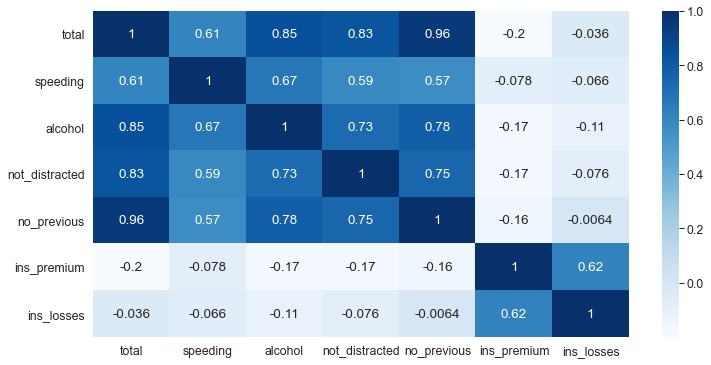

In [59]:
#Plotting 
plt.figure(figsize=(12,6))
sns.heatmap(crash_mx, annot=True, cmap='Blues') #annot means showing the numbers

**Another way to create a heatmap is by using a pivot table**<br>
Let's try another seaborn data!

In [60]:
#Import the data
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [61]:
#Create a pivot table
flights_pivot = flights.pivot_table(index='month', columns='year', values='passengers')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

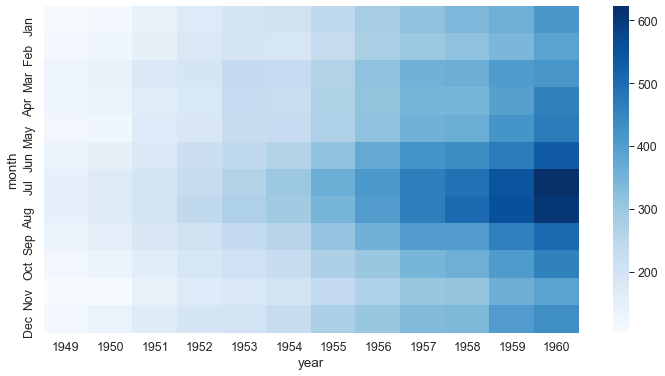

In [63]:
#Heatmap from pivo table
plt.figure(figsize=(12,6))
sns.heatmap(flights_pivot, cmap='Blues')

**We can also seperate data points!**

<AxesSubplot:xlabel='year', ylabel='month'>

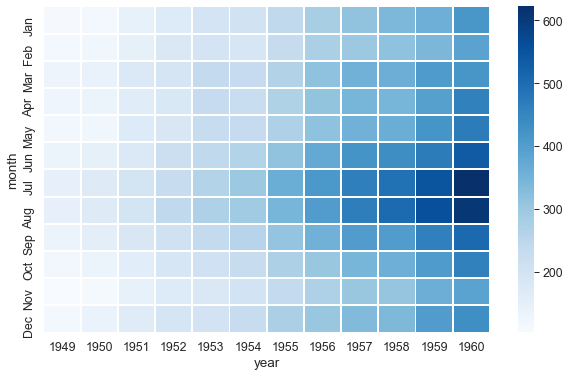

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(flights_pivot, cmap='Blues', linecolor='white', linewidth=1)

We can tell from our heatmap that most of the flights take place in July and August,<br>
and over time more people have been flying since 1949 up to 1960!

### 2: Cluster Map
- It's called hierarchically clustered heatmap.
- The distance beteween the points are going to be calculated <br> and then the closest are going to be joined.
- This is going to continue for the next closest.
- And then it's going to compare the columns and the rows of our heatmap.<br>

Let's use the iris data here!

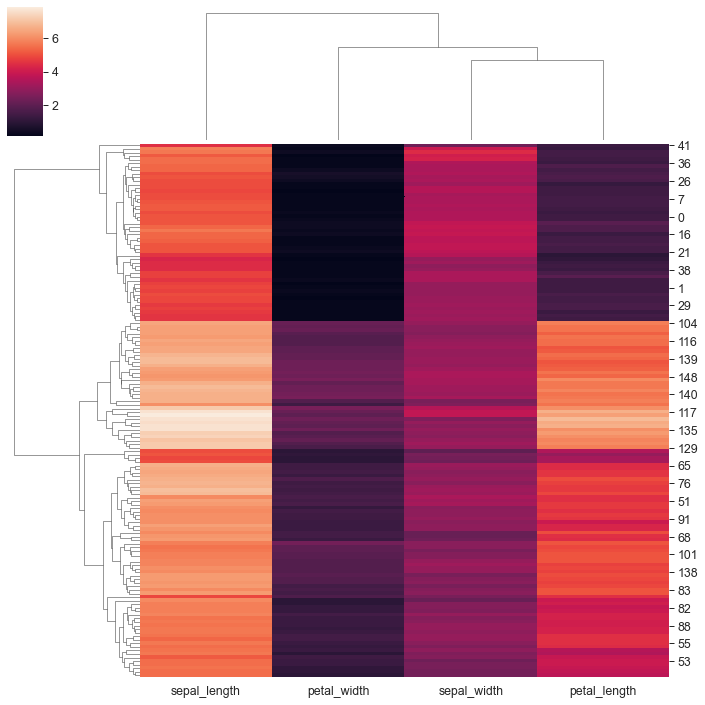

In [69]:
iris = sns.load_dataset('iris')
species = iris.pop('species')
sns.clustermap(iris)

**What about flights data?**

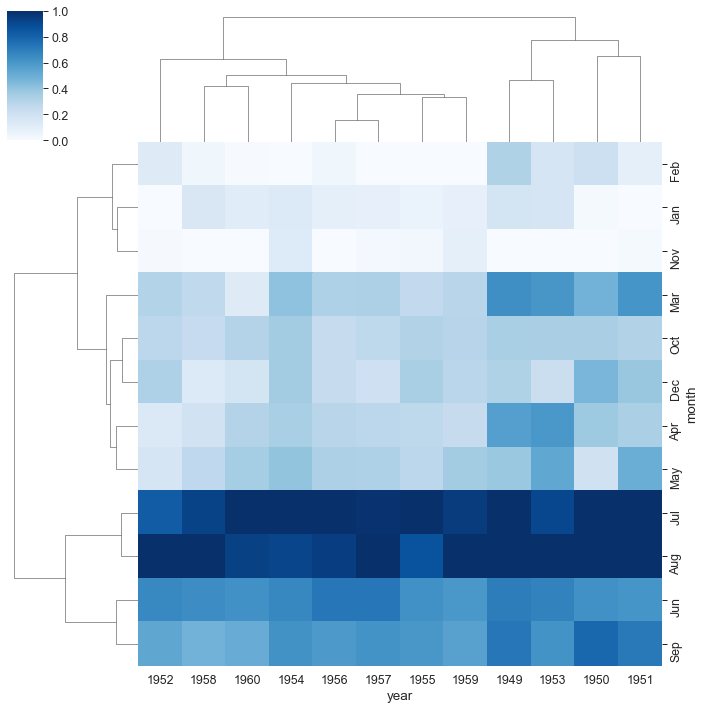

In [70]:
sns.clustermap(flights_pivot, cmap='Blues', standard_scale=1) 
#standard_scale: normalize the data to focus on the clustering (it's gonna miss up the years order)

You can see that we really focused in and **clustered** our July and August data<br>
and you can notice also the years are no longer in order.

## Pair Grid
- We have already talked about pair plots.
- We use pair grid to control over the pair plot.
- We can show specific plots with specific data and locations.

Let's first create an empty grid system based of the iris data

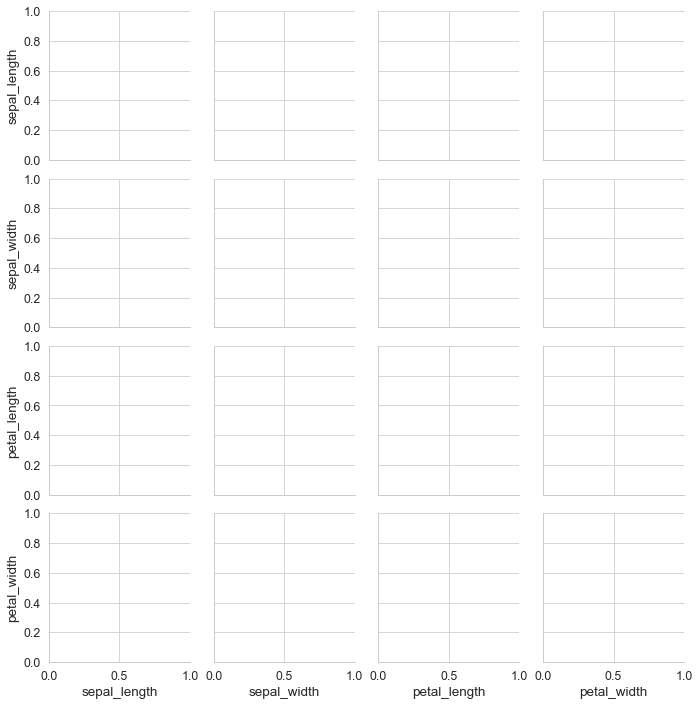

In [73]:
iris = sns.load_dataset('iris')
sns.PairGrid(iris, hue='species')

**Putting a scatter plot across the upper, lower, and the diagonal**

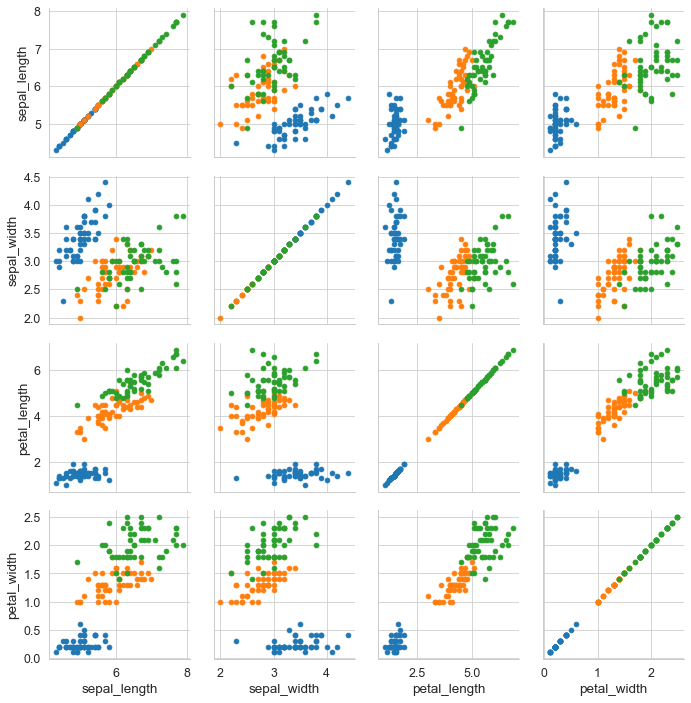

In [74]:
iris_grid = sns.PairGrid(iris, hue='species')
iris_grid.map(plt.scatter) 

**Putting different plots in the upper, lower, and the diagonal**
- Putting a histogram across the diagonal

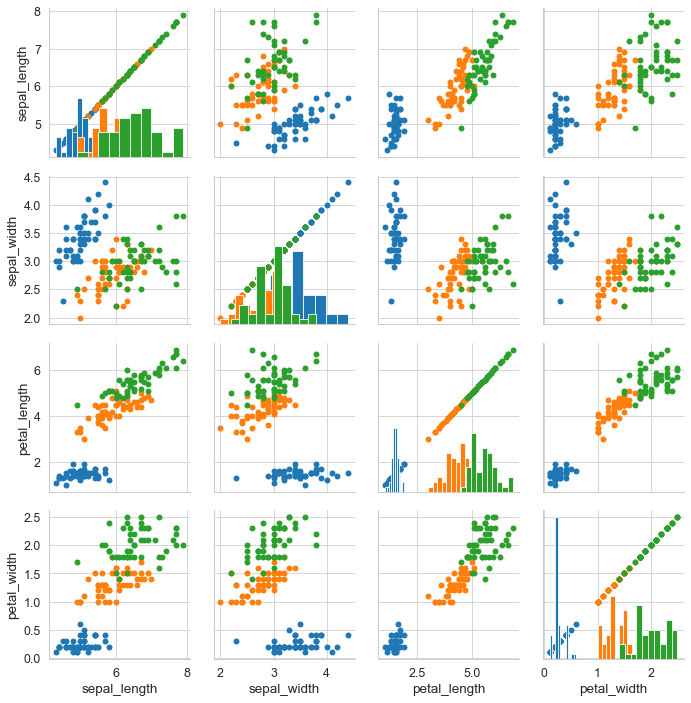

In [75]:
iris_grid.map(plt.scatter)
iris_grid.map_diag(plt.hist)

- Show the scatters on the upper and lower parts, with the histograms on the diagonal

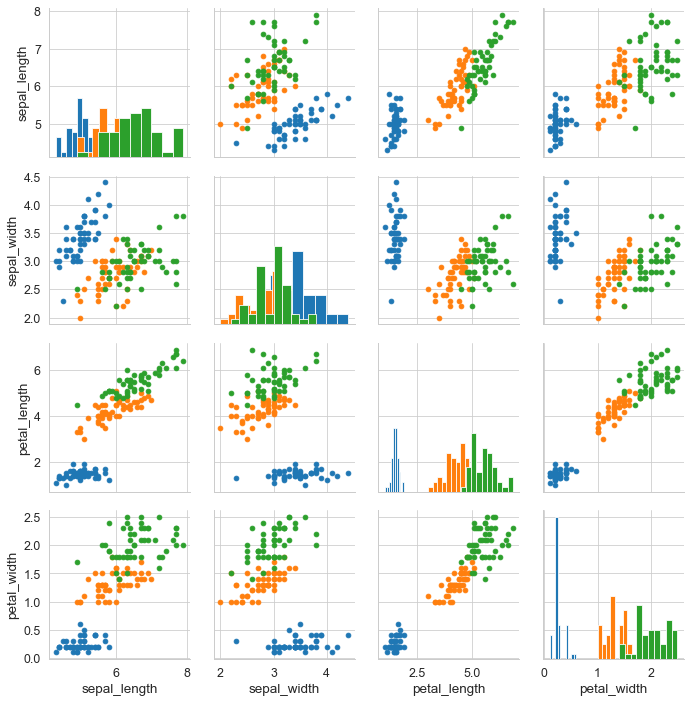

In [77]:
iris_grid = sns.PairGrid(iris, hue='species')
iris_grid.map_diag(plt.hist)
iris_grid.map_offdiag(plt.scatter)

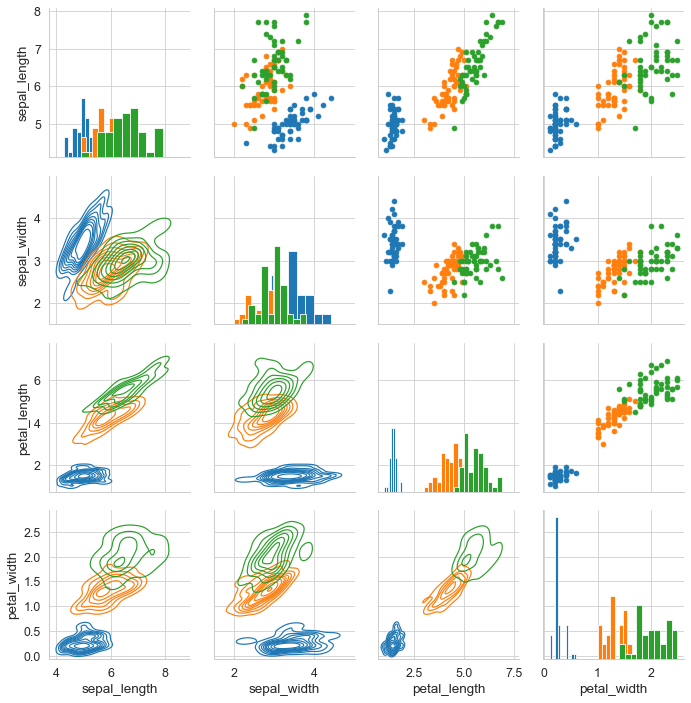

In [78]:
#upper->    Scatter
#lower->    KDE
#doagonal-> Histogram
iris_grid = sns.PairGrid(iris, hue='species')
iris_grid.map_diag(plt.hist)
iris_grid.map_upper(plt.scatter)
iris_grid.map_lower(sns.kdeplot)

**We can also define variables for our x and y**

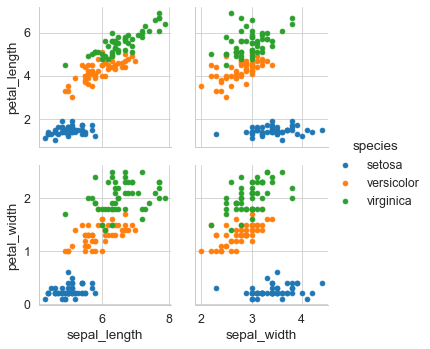

In [79]:
iris_grid = sns.PairGrid(iris, hue='species',
                        x_vars = ['sepal_length','sepal_width'],
                        y_vars = ['petal_length', 'petal_width']
                        )

iris_grid.map(plt.scatter)
iris_grid.add_legend()

## Facet Grid
- Print multiple plots in a grid in which you are going to be <br> able to define your columns and your rows.

Let's say we want to get a histogram for smokers and <br> non-smokers with total bill for a lunch and dinner!

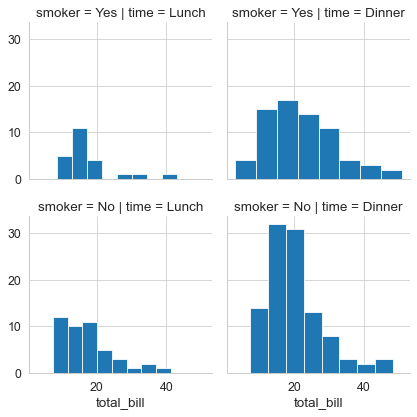

In [80]:
tips_facet_grid = sns.FacetGrid(tips_df, col='time', row='smoker')
tips_facet_grid.map(plt.hist, 'total_bill', bins=8)

**Let's make scatter plots with colored points for smoking <br> or not and compare total bill to tip**

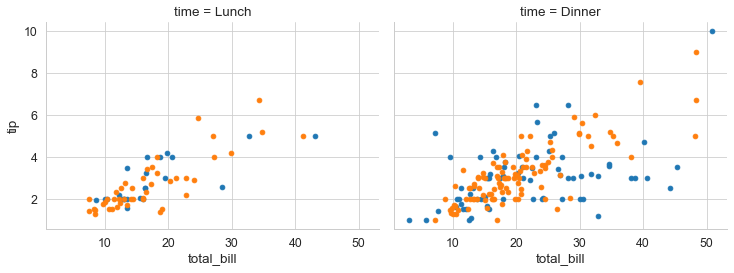

In [81]:
tips_facet_grid = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3)
tips_facet_grid.map(plt.scatter, 'total_bill', 'tip')

**Playing with markers**

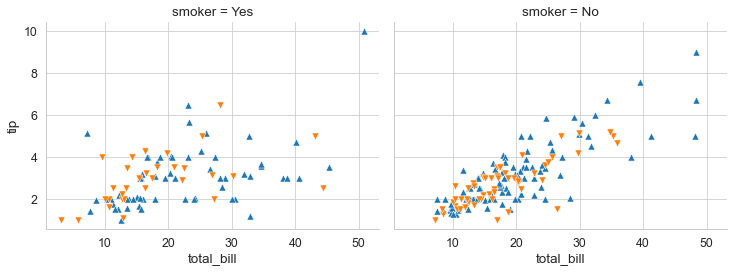

In [83]:
kws = dict(s = 50, linewidth = 0.5, edgecolor = 'w')
tips_facet_grid = sns.FacetGrid(tips_df, col='smoker', hue='sex', height=4, aspect=1.3,
                               hue_kws=dict(marker=['^','v']))

tips_facet_grid.map(plt.scatter, 'total_bill', 'tip', **kws)

### Regression Plots

In [84]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Let's study whether the total bill is going to affect the tip amount 
regarding of sex!**

<Figure size 864x576 with 0 Axes>

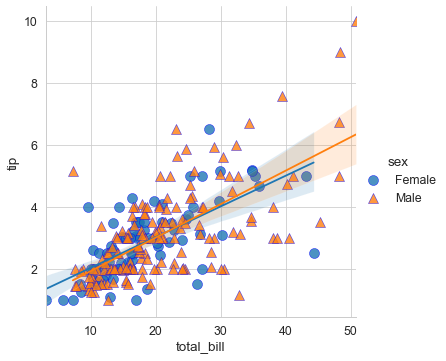

In [90]:
plt.figure(figsize=(12,8))
sns.lmplot(x = 'total_bill', y = 'tip',
            hue = 'sex',
            data = tips_df,
            hue_order = ['Female', 'Male'],
            markers = ['o','^'],
            scatter_kws = {'s': 100, 'linewidth': 0.5, 'edgecolor':'b'})

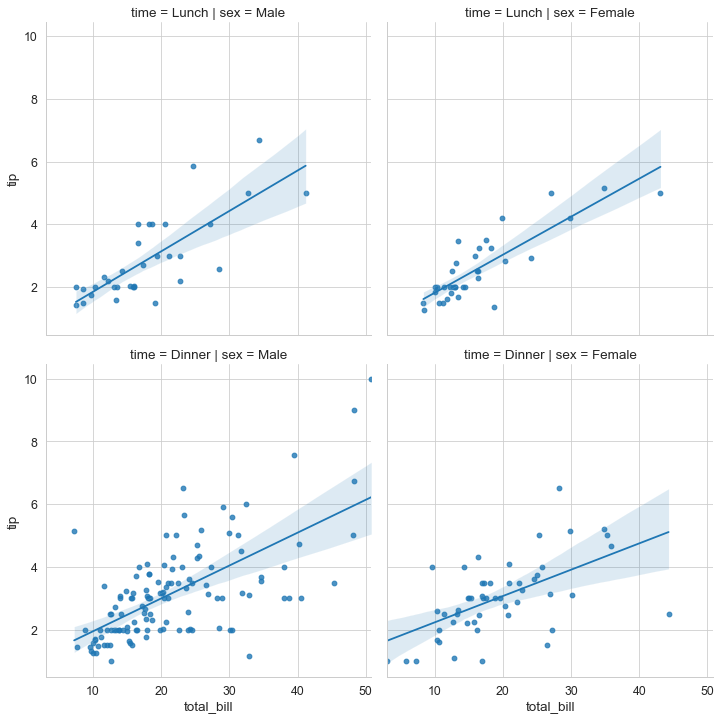

In [92]:
sns.lmplot(
x = 'total_bill',
y = 'tip',
col = 'sex',
row = 'time',
data = tips_df
)

# Best Regards,
## Ibrahim M. Nasser